## AI Hack - Crop Yield Challenge

**Challenge Description:**

For this challenge, you will be tackling one of the world's most important challenges: modelling crop yields. Climate change is having a big impact in global food security, whilst Earth's population, in particular, in the developing world, continues to grow. Extreme weather events can have significant [impacts](http://www.nature.com/articles/nclimate1832) on crops and there is (significant evidence)[https://www.metoffice.gov.uk/weather/climate/climate-and-extreme-weather] showing that, recently, extreme events have become (1) more extreme and (2) more frequent, making crop yield modelling a useful tool for policy makers and suppliers who are hoping to mitigate these devastating risks.

From a machine learning and statistical perspective, crop yield modelling is a challenging task that can be seen as a **weakly supervised learning** or **multiple instance learning** problem. For every year and census region (e.g. county), we can gather an abundance of features such as daily temperature, vegetation indices and soil moisture, but we only have access to 1 crop yield label. To perform regression, one usually requires the dataset $\{(x_i,y_i)\}_{i=1}^n$. In this case, however, we have $\{(\{x_{ij}\}_{j=1}^{N_i},y_i)\}_{i=1}^n$, where $N_i$ is the number of feature vectors available for label $y_i$. A naive approach would be to reduce to the former by averaging the covariates $\bar{x}_{i}=\sum_{j=1}^{N_i} x_{ij}$, but this may result in an enormous loss of information. 

Could you explore different approaches to modelling crop yields using the provided datasets?

**Data:**

You are provided with various cleaned datasets that are extracted from the State of Illinois, USA. 

- [ ] `IL_yield.csv` contains corn yields for various census counties in Illinois
- [ ] `illinois-counties.geojson` contains the geometries of counties in Illinois
- [ ] `EVI.csv` contains [Enhanced Vegetation Indices](https://en.wikipedia.org/wiki/Enhanced_vegetation_index) for pixels extract from [The Terra Moderate Resolution Imaging Spectroradiometer (MODIS) Vegetation Indices (MOD13Q1)](https://lpdaac.usgs.gov/products/mod13q1v006/) product, aggregated at the resolution of the pixels in the [The Terra and Aqua combined Moderate Resolution Imaging Spectroradiometer (MODIS) Land Cover Climate Modeling Grid (CMG) (MCD12C1)](https://lpdaac.usgs.gov/products/mcd12c1v006/) product that indicate `Majority_Land_Cover_Type_1` is a cropland. The EVI is observed every 16 days.
- `EVI_stacked.csv` is the same as `EVI.csv` except the data is stacked to include the EVI observations for each 16 days in the column.
- `ERA5.csv` contains 2m temperature readings from [ERA5 Renalaysis](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview), "the fifth generation ECMWF reanalysis for the global climate and weather for the past 4 to 7 decades". More information about the variable can be found in the link given.

**Recommended Reading:**
- https://ojs.aaai.org/index.php/AAAI/article/view/11172/11031&hl=en&sa=T&oi=gsb-gga&ct=res&cd=0&d=1880767705414439608&ei=6kgwYPHHCvGTy9YPmJeAsAk&scisig=AAGBfm0LS8pg3jC6MJQQE5-vz3M2kSQeDg
- https://aiforsocialgood.github.io/icml2019/accepted/track1/pdfs/20_aisg_icml2019.pdf
- http://proceedings.mlr.press/v80/ilse18a/ilse18a.pdf
- https://linkinghub.elsevier.com/retrieve/pii/S0034425711002926
- https://linkinghub.elsevier.com/retrieve/pii/S0034425719304791
- https://ieeexplore.ieee.org/document/9173550/
- https://royalsocietypublishing.org/doi/10.1098/rstb.2019.0510 
- http://www.nature.com/articles/nclimate1832
- http://www.nature.com/articles/nature16467
- https://royalsocietypublishing.org/doi/10.1098/rstb.2019.0510

**Suggestions:**

- [ ] It will be useful to make use of `pandas`, `geopandas` and `matplotlib` for data processing and visualisation.
- [ ] Be as creative and rigorous as possible with how you make use of the features.
- [ ] Try and take some time to read through the various papers on the recommended reading list.
- [ ] I recommend only using features between April - November 2015, as suggestioned by one of the papers on the list https://www.sciencedirect.com/science/article/pii/S0034425719304791?via%3Dihub. 


Good luck - we hope that you enjoy this challenge and look forward to seeing your submissions on Devpost!

In [1]:
!ls .

'AI Hack - Crop Yield Challenge.html'	      crops_yield
'AI Hack - Crop Yield Challenge.ipynb'	      csv.zip
 README_AI_Hack_21_Crop_Yield_Challenge.pdf   illinois-counties.geojson


## An illustrative plot

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [3]:
with zipfile.ZipFile('csv.zip', 'r') as zip_ref:
    zip_ref.extractall('crops_yield')

In [4]:
gdf = gpd.read_file("illinois-counties.geojson")
df = pd.read_csv("crops_yield/EVI_stacked.csv")

No handles with labels found to put in legend.


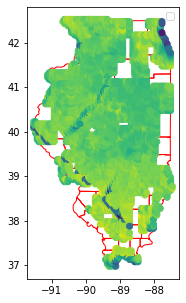

In [5]:
df_plot = df[df["year"]==2019]

fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(ax=ax, facecolor='none', edgecolor='red')

plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot["evi_1"])
plt.legend()

In [6]:
yield_crop = pd.read_csv("crops_yield/IL_yield.csv")
yield_crop = yield_crop[(yield_crop["year"] > 2002)&(yield_crop["year"] < 2013)]

In [8]:
vegetation = pd.read_csv("crops_yield/EVI_stacked.csv")
vegetation = vegetation[(vegetation["year"]>2002)&(vegetation["year"]<2013)]

,year,county,long,lat,evi_1,evi_17,evi_33,evi_49,evi_65,evi_81,...,evi_209,evi_225,evi_241,evi_257,evi_273,evi_289,evi_305,evi_321,evi_337,evi_353
13510,2003,ADAMS,-91.525,40.075,-0.068446,-0.138406,0.057493,-0.141041,-0.184824,-0.067173,...,-0.287053,0.093327,0.444249,-0.288821,0.032249,-0.291251,-0.042676,0.400765,-0.064134,-2.540578
13511,2003,ADAMS,-91.525,40.125,-0.087909,-0.148320,-0.108848,-0.143687,-0.131257,-0.085442,...,0.287452,0.049244,-0.129555,0.174260,-0.000848,0.088803,-0.063733,-0.282467,-0.079293,1.033897
13512,2003,ADAMS,-91.525,40.175,0.128406,0.004686,0.127752,0.045623,0.043033,0.129473,...,0.510152,0.433975,0.387768,0.368911,0.325827,0.236000,0.175610,0.131370,0.059498,-0.083789
13513,2003,ADAMS,-91.525,40.225,0.125818,0.006257,0.122064,0.108615,0.094790,0.130931,...,0.581958,0.488488,0.442147,0.419320,0.335271,0.235331,0.183393,0.138368,0.032044,-0.203793
13514,2003,ADAMS,-91.475,39.975,0.095104,0.005352,0.082710,0.107586,0.094120,0.100300,...,0.627333,0.506114,0.393845,0.313260,0.185111,0.136159,0.100782,0.100075,0.038052,0.091954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,2012,WILLIAMSON,-88.775,37.775,0.210592,0.229246,0.192189,0.175151,0.253861,0.425279,...,0.427147,0.420775,0.412241,0.430872,0.384523,0.346098,0.323944,0.305057,0.300999,0.269838
64693,2012,WILLIAMSON,-88.725,37.575,0.208148,0.219673,0.213600,0.210579,0.231257,0.318820,...,0.483741,0.475536,0.479816,0.500633,0.461380,0.318681,0.274488,0.254721,0.240581,0.215669
64694,2012,WILLIAMSON,-88.725,37.625,0.207204,0.200584,0.189267,0.194508,0.237558,0.339790,...,0.459362,0.463647,0.474181,0.474660,0.409239,0.320516,0.278822,0.256958,0.254404,0.234837
64695,2012,WILLIAMSON,-88.725,37.725,0.185585,0.182001,0.165420,0.165310,0.211134,0.326681,...,0.469476,0.465870,0.456398,0.477251,0.419014,0.311556,0.260532,0.240178,0.232704,0.186215


In [9]:
plotted = vegetation[(vegetation['year']>2002)&(vegetation['year']<2004)]


,year,county,long,lat,evi_1,evi_17,evi_33,evi_49,evi_65,evi_81,...,evi_209,evi_225,evi_241,evi_257,evi_273,evi_289,evi_305,evi_321,evi_337,evi_353
13510,2003,ADAMS,-91.525,40.075,-0.068446,-0.138406,0.057493,-0.141041,-0.184824,-0.067173,...,-0.287053,0.093327,0.444249,-0.288821,0.032249,-0.291251,-0.042676,0.400765,-0.064134,-2.540578
13511,2003,ADAMS,-91.525,40.125,-0.087909,-0.148320,-0.108848,-0.143687,-0.131257,-0.085442,...,0.287452,0.049244,-0.129555,0.174260,-0.000848,0.088803,-0.063733,-0.282467,-0.079293,1.033897
13512,2003,ADAMS,-91.525,40.175,0.128406,0.004686,0.127752,0.045623,0.043033,0.129473,...,0.510152,0.433975,0.387768,0.368911,0.325827,0.236000,0.175610,0.131370,0.059498,-0.083789
13513,2003,ADAMS,-91.525,40.225,0.125818,0.006257,0.122064,0.108615,0.094790,0.130931,...,0.581958,0.488488,0.442147,0.419320,0.335271,0.235331,0.183393,0.138368,0.032044,-0.203793
13514,2003,ADAMS,-91.475,39.975,0.095104,0.005352,0.082710,0.107586,0.094120,0.100300,...,0.627333,0.506114,0.393845,0.313260,0.185111,0.136159,0.100782,0.100075,0.038052,0.091954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20274,2003,WOODFORD,-88.975,40.875,0.097920,0.104269,0.100773,0.016990,0.035178,0.108703,...,0.750250,0.678266,0.457783,0.241393,0.168126,0.145950,0.117105,0.092032,0.092866,0.141741
20275,2003,WOODFORD,-88.975,40.925,0.099578,0.097194,0.102223,0.034236,0.048284,0.109544,...,0.721561,0.631900,0.413853,0.210813,0.159689,0.144811,0.119770,0.096756,0.094192,0.130503
20276,2003,WOODFORD,-88.925,40.825,0.101088,0.102447,0.104003,0.021883,0.039683,0.112953,...,0.758510,0.667647,0.468448,0.272916,0.163640,0.148182,0.114736,0.078628,0.096426,0.224694
20277,2003,WOODFORD,-88.925,40.875,0.101567,0.104638,0.105040,0.023017,0.038976,0.109717,...,0.736342,0.650998,0.443181,0.247322,0.166625,0.152861,0.124648,0.094495,0.099722,0.177652
